GRANT ALL PRIVILEGES ON *.* TO 'zabbix'@'172.16.8.%' IDENTIFIED BY 'zabbix' WITH GRANT OPTION;

https://docs.microsoft.com/zh-tw/azure/mysql/connect-python

In [1]:
import mysql.connector

In [2]:
from mysql.connector import errorcode

In [3]:
config = {
  'host':'172.16.8.176',
  'user':'zabbix',
  'password':'zabbix',
  'database':'zabbix'
}

In [4]:
try:
   conn = mysql.connector.connect(**config)
   print("Connection established")
except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with the user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
else:
  cursor = conn.cursor()

Connection established


In [5]:
import mysql.connector
from mysql.connector import errorcode

# Obtain connection string information from the portal
config = {
  'host':'172.16.8.176',
  'user':'zabbix',
  'password':'zabbix',
  'database':'zabbix'
}

# Construct connection string
try:
   conn = mysql.connector.connect(**config)
   print("Connection established")
except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with the user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
else:
  cursor = conn.cursor()

  # Read data
  cursor.execute("select * from history where clock > '1513675000' and itemid = '39762';")
  rows = cursor.fetchall()
  print("Read",cursor.rowcount,"row(s) of data.")

  # Print all rows
  for row in rows:
    print("Data row = (%s, %s, %s)" %(str(row[0]), str(row[1]), str(row[2])))

  # Cleanup
  conn.commit()
  cursor.close()
  conn.close()
  print("Done.")

Connection established
('Read', 45, 'row(s) of data.')
Data row = (39762, 1513675002, 0.0019)
Data row = (39762, 1513675017, 0.0026)
Data row = (39762, 1513675032, 0.0069)
Data row = (39762, 1513675047, 0.0018)
Data row = (39762, 1513675062, 0.0013)
Data row = (39762, 1513675077, 0.0017)
Data row = (39762, 1513675092, 0.0018)
Data row = (39762, 1513675107, 0.0018)
Data row = (39762, 1513675122, 0.002)
Data row = (39762, 1513675137, 0.0029)
Data row = (39762, 1513675152, 0.0013)
Data row = (39762, 1513675167, 0.0016)
Data row = (39762, 1513675182, 0.0019)
Data row = (39762, 1513675197, 0.0025)
Data row = (39762, 1513675212, 0.0019)
Data row = (39762, 1513675227, 0.0017)
Data row = (39762, 1513675242, 0.0018)
Data row = (39762, 1513675257, 0.0011)
Data row = (39762, 1513675272, 0.0026)
Data row = (39762, 1513675287, 0.0022)
Data row = (39762, 1513675302, 0.0015)
Data row = (39762, 1513675317, 0.0026)
Data row = (39762, 1513675332, 0.0015)
Data row = (39762, 1513675347, 0.0017)
Data row =

In [6]:
import pandas as pd
import numpy as np
newrows = np.array(rows)
print (newrows)

[[  3.97620000e+04   1.51367500e+09   1.90000000e-03   1.89759513e+08]
 [  3.97620000e+04   1.51367502e+09   2.60000000e-03   5.14522381e+08]
 [  3.97620000e+04   1.51367503e+09   6.90000000e-03   8.39803523e+08]
 [  3.97620000e+04   1.51367505e+09   1.80000000e-03   3.92158062e+08]
 [  3.97620000e+04   1.51367506e+09   1.30000000e-03   7.58406706e+08]
 [  3.97620000e+04   1.51367508e+09   1.70000000e-03   3.45201205e+08]
 [  3.97620000e+04   1.51367509e+09   1.80000000e-03   2.05116649e+08]
 [  3.97620000e+04   1.51367511e+09   1.80000000e-03   9.88432068e+08]
 [  3.97620000e+04   1.51367512e+09   2.00000000e-03   1.33843799e+08]
 [  3.97620000e+04   1.51367514e+09   2.90000000e-03   5.20540332e+08]
 [  3.97620000e+04   1.51367515e+09   1.30000000e-03   9.05320749e+08]
 [  3.97620000e+04   1.51367517e+09   1.60000000e-03   4.24658004e+08]
 [  3.97620000e+04   1.51367518e+09   1.90000000e-03   7.55537470e+08]
 [  3.97620000e+04   1.51367520e+09   2.50000000e-03   4.08236004e+08]
 [  3.

In [7]:
print newrows[0,1]

1513675002.0


In [8]:
newrows[:,2]

array([ 0.0019,  0.0026,  0.0069,  0.0018,  0.0013,  0.0017,  0.0018,
        0.0018,  0.002 ,  0.0029,  0.0013,  0.0016,  0.0019,  0.0025,
        0.0019,  0.0017,  0.0018,  0.0011,  0.0026,  0.0022,  0.0015,
        0.0026,  0.0015,  0.0017,  0.0016,  0.0021,  0.002 ,  0.002 ,
        0.011 ,  0.0022,  0.0135,  0.0027,  0.0022,  0.002 ,  0.0026,
        0.0017,  0.002 ,  0.0014,  0.0023,  0.0021,  0.0021,  0.0022,
        0.0027,  0.0018,  0.0023])

In [9]:
import matplotlib.pyplot as plt

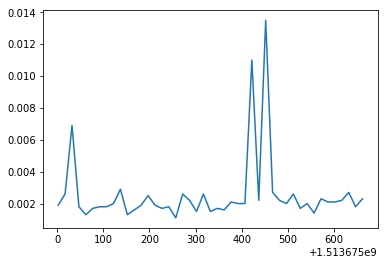

In [10]:
x = newrows[:,1]
y = newrows[:,2]
plt.plot(x,y)
plt.show()

In [11]:
import pandas as pd
import numpy as np
new = pd.Series(rows)
print (new)

0     (39762, 1513675002, 0.0019, 189759513)
1     (39762, 1513675017, 0.0026, 514522381)
2     (39762, 1513675032, 0.0069, 839803523)
3     (39762, 1513675047, 0.0018, 392158062)
4     (39762, 1513675062, 0.0013, 758406706)
5     (39762, 1513675077, 0.0017, 345201205)
6     (39762, 1513675092, 0.0018, 205116649)
7     (39762, 1513675107, 0.0018, 988432068)
8      (39762, 1513675122, 0.002, 133843799)
9     (39762, 1513675137, 0.0029, 520540332)
10    (39762, 1513675152, 0.0013, 905320749)
11    (39762, 1513675167, 0.0016, 424658004)
12    (39762, 1513675182, 0.0019, 755537470)
13    (39762, 1513675197, 0.0025, 408236004)
14    (39762, 1513675212, 0.0019, 192339572)
15    (39762, 1513675227, 0.0017, 176621906)
16    (39762, 1513675242, 0.0018, 425085072)
17    (39762, 1513675257, 0.0011, 731011399)
18     (39762, 1513675272, 0.0026, 44150928)
19    (39762, 1513675287, 0.0022, 263659640)
20     (39762, 1513675302, 0.0015, 94112983)
21    (39762, 1513675317, 0.0026, 755740014)
22     (39

In [12]:
df = pd.DataFrame(rows,columns=['itemid','clock','value','ns'])
df

,itemid,clock,value,ns
0,39762,1513675002,0.0019,189759513
1,39762,1513675017,0.0026,514522381
2,39762,1513675032,0.0069,839803523
3,39762,1513675047,0.0018,392158062
4,39762,1513675062,0.0013,758406706
5,39762,1513675077,0.0017,345201205
6,39762,1513675092,0.0018,205116649
7,39762,1513675107,0.0018,988432068
8,39762,1513675122,0.0020,133843799
9,39762,1513675137,0.0029,520540332


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
itemid    45 non-null int64
clock     45 non-null int64
value     45 non-null float64
ns        45 non-null int64
dtypes: float64(1), int64(3)
memory usage: 1.5 KB


In [14]:
df.describe()

,itemid,clock,value,ns
count,45.0,4.500000e+01,45.000000,4.500000e+01
mean,39762.0,1.513675e+09,0.002558,4.795345e+08
std,0.0,1.970089e+02,0.002290,3.023566e+08
min,39762.0,1.513675e+09,0.001100,1.937665e+07
25%,39762.0,1.513675e+09,0.001700,2.010662e+08
50%,39762.0,1.513675e+09,0.002000,4.250851e+08
75%,39762.0,1.513675e+09,0.002300,7.555375e+08
max,39762.0,1.513676e+09,0.013500,9.884321e+08


In [17]:
df[df['value'] > df['value'].quantile(0.8)].value

2     0.0069
9     0.0029
28    0.0110
30    0.0135
31    0.0027
42    0.0027
Name: value, dtype: float64

In [18]:
data = df.replace([df[df['value'] > df['value'].quantile(0.8)].value],df['value'].quantile(0.75))

In [19]:
data.describe()

,itemid,clock,value,ns
count,45.0,4.500000e+01,45.000000,4.500000e+01
mean,39762.0,1.513675e+09,0.001982,4.795345e+08
std,0.0,1.970089e+02,0.000374,3.023566e+08
min,39762.0,1.513675e+09,0.001100,1.937665e+07
25%,39762.0,1.513675e+09,0.001700,2.010662e+08
50%,39762.0,1.513675e+09,0.002000,4.250851e+08
75%,39762.0,1.513675e+09,0.002300,7.555375e+08
max,39762.0,1.513676e+09,0.002600,9.884321e+08


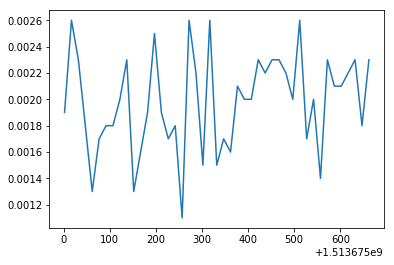

In [20]:
xx = data.clock
yy = data.value
plt.plot(xx,yy)
plt.show()